1. Galaxy Redshift
2. Continuum Fit
3. Continuum Subtraction
4. Equivalent Width
5. Fitting Gaussian
6. Monte Carlo
7. Parameter Estimation
8. Radial Velocity & Corner Plot

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from mpdaf.obj import Spectrum
from linetools.spectra.xspectrum1d import XSpectrum1D

import astropy.units as u
from astropy.io import fits
from astropy.modeling.models import Voigt1D, Gaussian1D
from astropy.convolution import convolve
from astropy.constants import c, m_e

from scipy.optimize import curve_fit
from scipy.ndimage import gaussian_filter1d
from scipy import constants as const
from scipy.optimize import root_scalar

from mpdaf.MUSE import LSF
from IPython.display import display, Image, HTML
import corner

In [2]:
%matplotlib qt
import matplotlib.pyplot as plt

In [3]:
# (A)
hdus_A = fits.open('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_A_0.8.fits')
spec_A = Spectrum('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_A_0.8.fits')

flux_A = hdus_A['DATA'].data*u.Unit(hdus_A[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_A = hdus_A['STAT'].data*u.Unit(hdus_A[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_A = np.sqrt(variance_A) #uncertainty is standard deviation
wavelength_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit)# Wavelength array

sp_A = XSpectrum1D.from_tuple((wavelength_A, flux_A, uncertainty_A))
sp_A.plot()

In [4]:
# (B)
hdus_B = fits.open('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_B_0.8.fits')
spec_B = Spectrum('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_B_0.8.fits')

flux_B = hdus_B['DATA'].data*u.Unit(hdus_B[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_B = hdus_B['STAT'].data*u.Unit(hdus_B[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_B = np.sqrt(variance_B) #uncertainty is standard deviation
wavelength_B = spec_B.wave.coord() * u.Unit(spec_B.wave.unit)# Wavelength array

sp_B = XSpectrum1D.from_tuple((wavelength_B, flux_B, uncertainty_B))
sp_B.plot()

In [5]:
# (C)
hdus_C = fits.open('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_C_0.8.fits')
spec_C = Spectrum('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_C_0.8.fits')

flux_C = hdus_C['DATA'].data*u.Unit(hdus_C[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_C = hdus_C['STAT'].data*u.Unit(hdus_C[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_C = np.sqrt(variance_C) #uncertainty is standard deviation
wavelength_C = spec_C.wave.coord() * u.Unit(spec_C.wave.unit)# Wavelength array

sp_C = XSpectrum1D.from_tuple((wavelength_C, flux_C, uncertainty_C))
sp_C.plot()

In [6]:
# (D)
hdus_D = fits.open('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_D_0.8.fits')
spec_D = Spectrum('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_D_0.8.fits')

flux_D = hdus_D['DATA'].data*u.Unit(hdus_D[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_D = hdus_D['STAT'].data*u.Unit(hdus_D[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_D = np.sqrt(variance_D) #uncertainty is standard deviation
wavelength_D = spec_D.wave.coord() * u.Unit(spec_D.wave.unit)# Wavelength array

sp_D = XSpectrum1D.from_tuple((wavelength_D, flux_D, uncertainty_D))
sp_D.plot()

In [7]:
# (G)
hdus_G = fits.open('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_G_0.8.fits')
spec_G = Spectrum('D:\Datacube\WGD2038-4008\spektrum_sum_WGD2038-4008_G_0.8.fits')

flux_G = hdus_G['DATA'].data*u.Unit(hdus_G[1].header['BUNIT'])  # Replace 'DATA' with the flux extension name
variance_G = hdus_G['STAT'].data*u.Unit(hdus_G[2].header['BUNIT'])  # Replace 'STAT' with the variance extension name
uncertainty_G = np.sqrt(variance_G) #uncertainty is standard deviation
wavelength_G = spec_G.wave.coord() * u.Unit(spec_G.wave.unit)# Wavelength array

sp_G = XSpectrum1D.from_tuple((wavelength_G, flux_G, uncertainty_G))
sp_G.plot()

# 1. Galaxy Redshift

In [11]:
# Ca II
lambda_3935 = 3934.777
f3935 = 6.82e-01
A3935 = 1.47e+08

lambda_3970 = 3969.591
f3970 = 3.3e-01
A3970 = 1.4e+08

# Na I
lambda_5892 = 5891.583253
f5892 = 6.41e-01
A5892 = 6.16e+07

lambda_5898 = 5897.558147
f5898 = 3.20e-01
A5898 = 6.14e+07
c_kms = c.to('km/s').value

%matplotlib inline
import matplotlib.pyplot as plt

uncertain_G = uncertainty_G[65:175]

loaded_data_G = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_G.npz")
co_G = loaded_data_G["values"] * u.Unit(spec_G.unit)

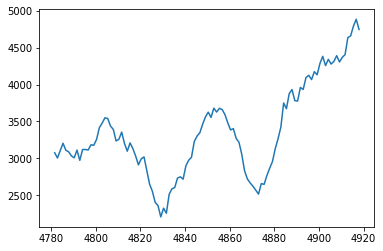

In [12]:
plt.plot(wavelength_G[65:175], flux_G[65:175])

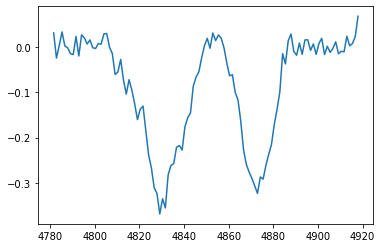

In [13]:
#wavelengths_G2 = wave_G2.value
fluxes_gal = (flux_G[65:175].value / co_G.value) - 1
uncertainties_gal = (uncertain_G.value / co_G.value)
plt.plot(wavelength_G[65:175], fluxes_gal)

In [14]:
def convolved_model(x, amp, mu, sigma, amp2, mu2, sigma2):
    intrinsic_profile = (amp * np.exp(-0.5 * ((x - mu)/sigma)**2)) + (amp2 * np.exp(-0.5 * ((x - mu2)/sigma2)**2))
    return intrinsic_profile

# (G) Ca II
p0_gal = [-0.5, 4830, 7, -0.5, 4872, 7]

popt_gal, _ = curve_fit(convolved_model, wavelength_G[65:175], fluxes_gal, p0=p0_gal)
popt_gal

array([-3.24280355e-01,  4.83042301e+03,  8.56770136e+00, -3.23048923e-01,
        4.87273670e+03,  6.23581929e+00])

Estimated Noise Standard Deviation: 1.627


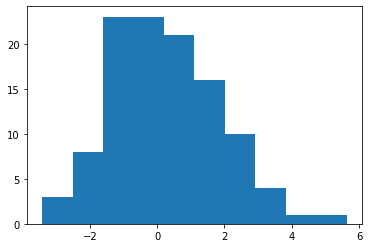

In [15]:
residuals_gal = fluxes_gal - convolved_model(wavelength_G[65:175].value, *popt_gal)

plt.hist(residuals_gal / uncertainties_gal)

std_gal = np.std(residuals_gal / uncertainties_gal)
print(f"Estimated Noise Standard Deviation: {std_gal:.3f}")

Estimated Noise Standard Deviation: 1.316


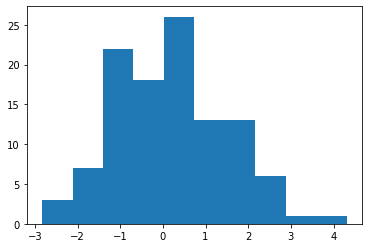

In [16]:
sigma_floor_gal = 0.01
sigma_adjusted_gal = np.sqrt(uncertainties_gal**2 + sigma_floor_gal**2)

plt.hist(residuals_gal / sigma_adjusted_gal)

std_gal = np.std(residuals_gal / sigma_adjusted_gal)
print(f"Estimated Noise Standard Deviation: {std_gal:.3f}")

In [17]:
chi_squared_gal = np.sum((residuals_gal / sigma_adjusted_gal) ** 2)
dof_gal = len(fluxes_gal) - len(popt_gal)

reduced_chi_squared_gal = chi_squared_gal / dof_gal

print(f'Chi-squared: {chi_squared_gal:.3f}')
print(f'Degree of freedom: {dof_gal:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_gal:.3f}')

Chi-squared: 194.376
Degree of freedom: 104.000
Reduced Chi-squared: 1.869


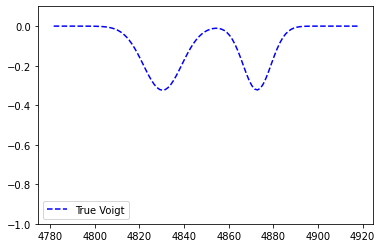

In [18]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_mu2_3935, recovered_std2_3935) = popt_gal

true_spectrum_gal = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelength_G[65:175], true_spectrum_gal(wavelength_G[65:175].value), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

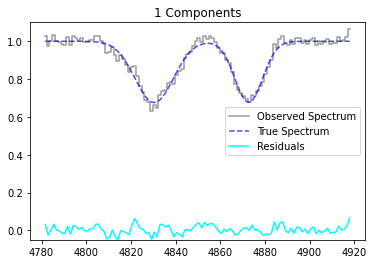

In [19]:
plt.figure()
plt.plot(wavelength_G[65:175], fluxes_gal+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelength_G[65:175], true_spectrum_gal(wavelength_G[65:175].value)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelength_G[65:175], residuals_gal, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

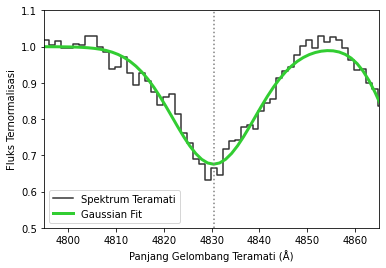

In [20]:
plt.plot(wavelength_G[65:175], fluxes_gal+1, 'k', alpha=0.8, drawstyle='steps-mid', label='Spektrum Teramati')
plt.plot(wavelength_G[65:175], true_spectrum_gal(wavelength_G[65:175].value)+1, lw=3, color='limegreen', label='Gaussian Fit')
plt.axvline(recovered_mu_3935, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(4795, 4865)
plt.ylabel("Fluks Ternormalisasi")
plt.xlabel("Panjang Gelombang Teramati (Å)")
plt.legend(loc='best')

In [21]:
sim_mu_gal = []

n_sim = 1000

for x in range(0, n_sim):
    sim_fluxes_gal = fluxes_gal + np.random.normal(0, sigma_adjusted_gal)
    
    popt_gal, _ = curve_fit(convolved_model, wavelength_G[65:175], sim_fluxes_gal, p0=p0_gal)
    (recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_mu2_3935, recovered_std2_3935) = popt_gal
    sim_mu_gal.append(recovered_mu_3935)
    
print("Simulation is done")

Simulation is done


In [22]:
sim_mu_gal = np.array(sim_mu_gal)
sim_mu_gal_mean = np.mean(sim_mu_gal)
sim_mu_gal_std = np.std(sim_mu_gal)

print(f"Fitted Mu gal: {sim_mu_gal_mean:.3f} ± {sim_mu_gal_std:.3f} Angstrom")

Fitted Mu gal: 4830.417 ± 0.195 Angstrom


In [23]:
z = (sim_mu_gal_mean - lambda_3935) / lambda_3935

err_z = sim_mu_gal_std / lambda_3935
print(f"Redshift: {z} ± {err_z} Angstrom")

Redshift: 0.22762149080108104 ± 4.9551094622681646e-05 Angstrom


# 2. Continuum Fit

In [24]:
%matplotlib qt
import matplotlib.pyplot as plt

## (A) Ca II Continuum Fit

In [25]:
flux_masked_A = flux_A[65:175]
uncertainty_masked_A = uncertainty_A[65:175]
rest_wavelength_masked_A = wavelength_A[65:175]/(1+z)

sp_masked_rest_A = XSpectrum1D.from_tuple((rest_wavelength_masked_A, flux_masked_A, uncertainty_masked_A))
sp_masked_rest_A.plot()

In [10]:
sp_masked_rest_A.fit_continuum()

knots file exists, use this? (y) n


C:\Users\hp\anaconda3\lib\site-packages\linetools\analysis\interactive_plot.py:347: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  m0, = a1.plot([0],[0],'.r',marker='.', mec='none', lw=0, mew=0,



i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [11]:
sp_masked_rest_A.co

<Quantity [2684.526 , 2762.9482, 2761.471 , 2755.6233, 2744.8677,
           2722.9988, 2706.278 , 2762.5825, 2815.7705, 2805.8499,
           2800.9968, 2816.2458, 2832.9866, 2849.8186, 2865.6292,
           2879.3198, 2891.2288, 2902.6511, 2914.529 , 2927.839 ,
           2943.523 , 2960.6162, 2977.7085, 2993.613 , 3008.5535,
           3022.6653, 3036.0002, 3048.6106, 3060.5479, 3071.8643,
           3082.6113, 3092.8416, 3102.6064, 3111.958 , 3120.9482,
           3129.629 , 3138.052 , 3146.2695, 3154.3333, 3162.2952,
           3170.2073, 3178.121 , 3186.089 , 3194.1628, 3202.3945,
           3210.8357, 3219.5383, 3228.5547, 3237.9365, 3247.7356,
           3258.004 , 3268.7932, 3280.1558, 3292.1433, 3304.8079,
           3333.77  , 3409.8184, 3414.3054, 3374.26  , 3341.5393,
           3339.0005, 3337.7935, 3336.67  , 3335.6611, 3334.7979,
           3334.1113, 3333.6323, 3333.392 , 3333.4219, 3333.7522,
           3334.4146, 3335.4397, 3336.859 , 3338.703 , 3341.003 ,
          

In [12]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_A.npz", values=sp_masked_rest_A.co.value, unit=str(sp_masked_rest_A.co.unit))

## (A) Na I Continuum Fit

In [26]:
flux_masked_A2 = flux_A[2000:2080]
uncertainty_masked_A2 = uncertainty_A[2000:2080]
rest_wavelength_masked_A2 = wavelength_A[2000:2080]/(1+z)

sp_masked_rest_A2 = XSpectrum1D.from_tuple((rest_wavelength_masked_A2, flux_masked_A2, uncertainty_masked_A2))
sp_masked_rest_A2.plot()

In [15]:
sp_masked_rest_A2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [16]:
sp_masked_rest_A2.co

<Quantity [4022.9973, 4089.5178, 4133.213 , 4176.9077, 4173.698 ,
           4159.247 , 4146.2876, 4142.133 , 4139.2705, 4137.702 ,
           4138.623 , 4143.2266, 4156.6196, 4181.4673, 4211.547 ,
           4240.557 , 4262.1987, 4273.996 , 4283.2554, 4290.609 ,
           4296.182 , 4300.1006, 4302.4897, 4303.4746, 4303.1807,
           4301.7324, 4299.2563, 4295.877 , 4291.719 , 4286.909 ,
           4281.5723, 4275.833 , 4269.817 , 4263.6494, 4257.4556,
           4251.361 , 4241.1562, 4211.693 , 4175.5386, 4148.769 ,
           4167.769 , 4270.591 , 4299.874 , 4293.1206, 4281.111 ,
           4264.252 , 4239.271 , 4212.5938, 4196.5015, 4204.0293,
           4227.4116, 4246.8267, 4251.1177, 4251.5146, 4249.889 ,
           4247.4917, 4245.5728, 4245.3843, 4248.1763, 4257.399 ,
           4273.995 , 4293.4106, 4311.0566, 4318.5615, 4295.9663,
           4269.7617, 4300.247 , 4369.043 , 4330.098 , 4274.8726,
           4247.999 , 4249.6245, 4253.7754, 4247.266 , 4232.0815,
          

In [17]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_A_Nai.npz", values=sp_masked_rest_A2.co.value, unit=str(sp_masked_rest_A2.co.unit))

## (B) Ca II Continuum Fit

In [27]:
flux_masked_B = flux_B[65:175]
uncertainty_masked_B = uncertainty_B[65:175]
rest_wavelength_masked_B = wavelength_B[65:175]/(1+z)

sp_masked_rest_B = XSpectrum1D.from_tuple((rest_wavelength_masked_B, flux_masked_B, uncertainty_masked_B))
sp_masked_rest_B.plot()

In [19]:
sp_masked_rest_B.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [20]:
sp_masked_rest_B.co

<Quantity [3058.9783, 3097.3018, 3074.4377, 3064.3574, 3064.7524,
           3073.3152, 3103.2485, 3160.681 , 3208.6704, 3206.354 ,
           3146.132 , 3077.9136, 3054.374 , 3090.0173, 3134.2253,
           3171.9045, 3206.022 , 3238.645 , 3263.3499, 3274.4048,
           3273.9612, 3269.1355, 3267.118 , 3272.9695, 3280.154 ,
           3287.4033, 3294.7285, 3302.1409, 3309.6514, 3317.2712,
           3325.0122, 3332.8848, 3340.901 , 3349.0713, 3357.4075,
           3365.9204, 3374.6213, 3383.522 , 3392.6328, 3401.9656,
           3411.5315, 3421.3416, 3431.4072, 3441.7395, 3452.3496,
           3463.249 , 3474.4487, 3485.96  , 3497.7942, 3509.9624,
           3522.69  , 3537.0042, 3552.8499, 3570.0042, 3588.2446,
           3607.3481, 3627.0925, 3648.5444, 3679.8691, 3714.5945,
           3742.9526, 3761.8054, 3776.6265, 3787.781 , 3795.5918,
           3800.382 , 3802.4753, 3802.194 , 3799.862 , 3795.802 ,
           3790.3372, 3783.7905, 3776.4856, 3768.745 , 3760.8923,
          

In [21]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_B.npz", values=sp_masked_rest_B.co.value, unit=str(sp_masked_rest_B.co.unit))

## (B) Na I Continuum Fit

In [28]:
flux_masked_B2 = flux_B[2000:2080]
uncertainty_masked_B2 = uncertainty_B[2000:2080]
rest_wavelength_masked_B2 = wavelength_B[2000:2080]/(1+z)

sp_masked_rest_B2 = XSpectrum1D.from_tuple((rest_wavelength_masked_B2, flux_masked_B2, uncertainty_masked_B2))
sp_masked_rest_B2.plot()

In [23]:
sp_masked_rest_B2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [24]:
sp_masked_rest_B2.co

<Quantity [4280.8955, 4281.6914, 4297.4585, 4313.2256, 4328.4673,
           4343.2783, 4357.754 , 4371.9883, 4386.076 , 4400.2256,
           4415.216 , 4430.192 , 4443.935 , 4455.227 , 4462.85  ,
           4465.687 , 4466.5854, 4467.3936, 4468.2007, 4469.076 ,
           4469.9575, 4470.827 , 4471.6885, 4472.5435, 4473.3936,
           4474.2417, 4475.09  , 4475.9404, 4476.7954, 4477.6567,
           4478.5273, 4479.4087, 4480.303 , 4481.2134, 4482.141 ,
           4483.089 , 4484.0586, 4485.0522, 4486.0728, 4487.122 ,
           4488.8022, 4491.51  , 4494.832 , 4498.3555, 4501.668 ,
           4504.385 , 4506.4873, 4508.1826, 4509.6787, 4511.1846,
           4512.909 , 4515.0615, 4517.8496, 4521.4834, 4526.1636,
           4531.9106, 4538.5674, 4545.971 , 4553.959 , 4562.3677,
           4571.0337, 4579.795 , 4588.488 , 4596.949 , 4605.016 ,
           4612.675 , 4620.0723, 4627.0835, 4633.576 , 4617.2056,
           4554.6074, 4504.7495, 4481.224 , 4461.256 , 4445.1997,
          

In [25]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_B_Nai.npz", values=sp_masked_rest_B2.co.value, unit=str(sp_masked_rest_B2.co.unit))

## (C) Ca II Continuum Fit

In [29]:
flux_masked_C = flux_C[65:175]
uncertainty_masked_C = uncertainty_C[65:175]
rest_wavelength_masked_C = wavelength_C[65:175]/(1+z)

sp_masked_rest_C = XSpectrum1D.from_tuple((rest_wavelength_masked_C, flux_masked_C, uncertainty_masked_C))
sp_masked_rest_C.plot()

In [27]:
sp_masked_rest_C.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [28]:
sp_masked_rest_C.co

<Quantity [3270.5261, 3367.125 , 3350.778 , 3338.8394, 3331.7107,
           3329.7947, 3333.317 , 3340.4807, 3350.8625, 3364.6511,
           3382.0354, 3403.2039, 3429.4702, 3461.4497, 3494.426 ,
           3523.4597, 3546.0554, 3562.257 , 3568.2744, 3565.2822,
           3563.6797, 3571.0334, 3579.7683, 3588.651 , 3597.6821,
           3606.8623, 3616.192 , 3625.6716, 3635.3018, 3645.083 ,
           3655.0156, 3665.1   , 3675.3374, 3685.7275, 3696.271 ,
           3706.9688, 3717.8208, 3728.8281, 3739.9907, 3751.3096,
           3762.785 , 3774.4172, 3786.207 , 3798.1548, 3810.2612,
           3822.5269, 3834.9517, 3847.5369, 3860.2825, 3873.1892,
           3886.2573, 3899.4878, 3912.8806, 3926.4365, 3940.156 ,
           3954.0398, 3969.9324, 3989.4165, 4009.1377, 4025.6401,
           4035.5642, 4042.2144, 4048.7346, 4055.1326, 4061.4155,
           4067.5903, 4073.6643, 4079.645 , 4085.5396, 4091.3547,
           4097.098 , 4102.777 , 4108.3984, 4113.9697, 4119.4976,
          

In [29]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_C.npz", values=sp_masked_rest_C.co.value, unit=str(sp_masked_rest_C.co.unit))

## (C) Na I Continuum Fit

In [30]:
flux_masked_C2 = flux_C[2000:2080]
uncertainty_masked_C2 = uncertainty_C[2000:2080]
rest_wavelength_masked_C2 = wavelength_C[2000:2080]/(1+z)

sp_masked_rest_C2 = XSpectrum1D.from_tuple((rest_wavelength_masked_C2, flux_masked_C2, uncertainty_masked_C2))
sp_masked_rest_C2.plot()

In [32]:
sp_masked_rest_C2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [33]:
sp_masked_rest_C2.co

<Quantity [4837.95  , 4989.4155, 4970.125 , 4950.835 , 4941.388 ,
           4943.762 , 4961.6875, 4994.7407, 5024.923 , 5038.5566,
           5049.4707, 5059.585 , 5068.2256, 5074.7163, 5078.3833,
           5078.62  , 5077.4683, 5076.1885, 5074.832 , 5073.4277,
           5071.9087, 5070.277 , 5068.544 , 5066.7227, 5064.825 ,
           5062.8633, 5060.85  , 5058.7974, 5056.7173, 5054.622 ,
           5052.5244, 5050.436 , 5048.37  , 5046.338 , 5044.352 ,
           5042.425 , 5040.569 , 5038.796 , 5037.118 , 5035.5483,
           5034.0986, 5032.781 , 5039.6846, 5077.875 , 5116.0327,
           5126.107 , 5130.369 , 5133.5854, 5136.034 , 5137.9937,
           5139.741 , 5141.555 , 5143.714 , 5146.4946, 5150.1763,
           5154.8633, 5160.146 , 5165.926 , 5172.1333, 5178.7   ,
           5185.5576, 5192.6357, 5199.8667, 5207.181 , 5214.5103,
           5238.052 , 5290.469 , 5337.3047, 5337.95  , 5220.1724,
           5152.3677, 5106.401 , 5069.034 , 5044.0537, 5022.9727,
          

In [34]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_C_Nai.npz", values=sp_masked_rest_C2.co.value, unit=str(sp_masked_rest_C2.co.unit))

## (D) Ca II Continuum Fit

In [31]:
flux_masked_D = flux_D[65:175]
uncertainty_masked_D = uncertainty_D[65:175]
rest_wavelength_masked_D = wavelength_D[65:175]/(1+z)

sp_masked_rest_D = XSpectrum1D.from_tuple((rest_wavelength_masked_D, flux_masked_D, uncertainty_masked_D))
sp_masked_rest_D.plot()

In [36]:
sp_masked_rest_D.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [37]:
sp_masked_rest_D.co

<Quantity [2172.0034, 2226.697 , 2234.6406, 2257.105 , 2307.8132,
           2289.0793, 2227.6655, 2199.752 , 2186.1545, 2183.818 ,
           2193.8845, 2212.461 , 2238.1082, 2269.3953, 2305.7168,
           2378.1099, 2459.764 , 2492.7927, 2487.015 , 2469.23  ,
           2450.0803, 2440.2078, 2440.5261, 2440.7993, 2440.9438,
           2440.996 , 2440.9934, 2440.9722, 2440.9695, 2441.022 ,
           2441.1663, 2441.4395, 2441.8782, 2442.5193, 2443.3994,
           2444.5554, 2446.0244, 2447.8425, 2450.0474, 2452.675 ,
           2455.7625, 2459.3467, 2463.4644, 2468.1523, 2473.4473,
           2479.386 , 2486.0054, 2493.342 , 2501.4329, 2510.315 ,
           2520.0247, 2530.5989, 2542.0745, 2554.488 , 2571.943 ,
           2596.6387, 2623.624 , 2647.9226, 2665.6113, 2680.3591,
           2693.281 , 2704.5115, 2714.185 , 2722.4365, 2729.4006,
           2735.2122, 2740.0054, 2743.915 , 2747.076 , 2749.6228,
           2751.6904, 2753.4128, 2754.9255, 2756.3625, 2757.859 ,
          

In [38]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_D.npz", values=sp_masked_rest_D.co.value, unit=str(sp_masked_rest_D.co.unit))

## (D) Na I Continuum Fit

In [32]:
flux_masked_D2 = flux_D[2000:2080]
uncertainty_masked_D2 = uncertainty_D[2000:2080]
rest_wavelength_masked_D2 = wavelength_D[2000:2080]/(1+z)

sp_masked_rest_D2 = XSpectrum1D.from_tuple((rest_wavelength_masked_D2, flux_masked_D2, uncertainty_masked_D2))
sp_masked_rest_D2.plot()

In [40]:
sp_masked_rest_D2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [41]:
sp_masked_rest_D2.co

<Quantity [4253.7383, 4369.913 , 4381.273 , 4391.3247, 4399.5713,
           4405.517 , 4408.6655, 4408.8555, 4407.6523, 4405.565 ,
           4402.876 , 4399.868 , 4396.824 , 4394.0264, 4391.7583,
           4390.286 , 4389.2417, 4388.3574, 4387.6304, 4387.0576,
           4386.636 , 4386.3623, 4386.234 , 4386.247 , 4386.399 ,
           4386.6865, 4387.107 , 4387.6562, 4388.3325, 4389.132 ,
           4390.052 , 4391.0884, 4392.2393, 4393.501 , 4394.871 ,
           4396.3457, 4397.922 , 4399.5967, 4401.367 , 4403.2305,
           4405.1826, 4407.221 , 4409.626 , 4425.8613, 4449.9614,
           4463.2896, 4457.174 , 4441.834 , 4424.267 , 4411.4346,
           4408.149 , 4407.291 , 4406.8945, 4406.295 , 4404.8257,
           4402.0083, 4398.269 , 4394.072 , 4389.6387, 4381.257 ,
           4368.847 , 4354.235 , 4339.247 , 4325.71  , 4319.903 ,
           4365.8076, 4446.399 , 4526.432 , 4570.6636, 4419.748 ,
           4377.324 , 4460.9375, 4439.4707, 4391.8853, 4344.9683,
          

In [42]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_D_Nai.npz", values=sp_masked_rest_D2.co.value, unit=str(sp_masked_rest_D2.co.unit))

## (G) Ca II Continuum Fit

In [33]:
flux_masked_G = flux_G[65:175]
uncertainty_masked_G = uncertainty_G[65:175]
rest_wavelength_masked_G = wavelength_G[65:175]/(1+z)

sp_masked_rest_G = XSpectrum1D.from_tuple((rest_wavelength_masked_G, flux_masked_G, uncertainty_masked_G))
sp_masked_rest_G.plot()

In [86]:
sp_masked_rest_G.fit_continuum()

knots file exists, use this? (y) N


C:\Users\hp\anaconda3\lib\site-packages\linetools\analysis\interactive_plot.py:347: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string ".r" (-> marker='.'). The keyword argument will take precedence.
  m0, = a1.plot([0],[0],'.r',marker='.', mec='none', lw=0, mew=0,



i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [87]:
sp_masked_rest_G.co

<Quantity [2984.8806, 3081.5283, 3096.0776, 3102.9207, 3104.5642,
           3096.0027, 3079.4028, 3060.095 , 3043.409 , 3034.6746,
           3040.0662, 3061.0127, 3094.2834, 3136.62  , 3184.7646,
           3268.7214, 3391.277 , 3456.5503, 3451.6995, 3439.9097,
           3440.4932, 3443.4504, 3446.3223, 3449.1191, 3451.851 ,
           3454.5286, 3457.1616, 3459.7605, 3462.3352, 3464.8965,
           3467.454 , 3470.0183, 3472.5996, 3475.2083, 3477.854 ,
           3480.5476, 3483.2988, 3486.1182, 3489.0159, 3492.0022,
           3495.0872, 3498.281 , 3501.5942, 3505.0366, 3508.619 ,
           3512.3508, 3516.2432, 3520.3057, 3524.5486, 3528.9824,
           3533.617 , 3538.4631, 3543.5305, 3548.8296, 3554.3704,
           3560.1604, 3566.1897, 3572.4626, 3578.9868, 3585.7695,
           3592.818 , 3600.1558, 3607.9116, 3616.086 , 3624.6462,
           3633.5605, 3642.796 , 3652.32  , 3662.1006, 3672.105 ,
           3682.3008, 3692.6558, 3703.1372, 3713.7126, 3724.35  ,
          

In [106]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_G.npz", values=sp_masked_rest_G.co.value, unit=str(sp_masked_rest_G.co.unit))

## (G) Na I Continuum Fit

In [34]:
flux_masked_G2 = flux_G[2000:2080]
uncertainty_masked_G2 = uncertainty_G[2000:2080]
rest_wavelength_masked_G2 = wavelength_G[2000:2080]/(1+z)

sp_masked_rest_G2 = XSpectrum1D.from_tuple((rest_wavelength_masked_G2, flux_masked_G2, uncertainty_masked_G2))
sp_masked_rest_G2.plot()

In [90]:
sp_masked_rest_G2.fit_continuum()

knots file exists, use this? (y) n

i,o          Zoom in/out x limits
y            Zoom out y limits
Y            Guess y limits
t,b          Set y top/bottom limit
l,r          Set left/right x limit
[,]          Pan left/right
w            Plot the whole spectrum

S,U          Smooth/unsmooth spectrum

a        : add a new spline knot
A        : add a new spline knot, and use a flux median to guess y position
+        : double the number of spline knots
_        : halve the number of spline knots
d        : delete the nearest knot
m        : move the nearest knot
M        : move the nearest knot, and use a flux median to guess y position
c        : toggle initial continuum display

q        : quit

Updating continuum.


In [91]:
sp_masked_rest_G2.co

<Quantity [6523.67  , 6634.8804, 6641.916 , 6647.76  , 6651.9243,
           6653.9224, 6653.267 , 6650.4106, 6646.5996, 6642.1626,
           6637.422 , 6632.7007, 6628.3228, 6624.552 , 6621.0737,
           6617.7754, 6614.6494, 6611.6904, 6608.8906, 6606.243 ,
           6603.742 , 6601.38  , 6599.1504, 6597.0464, 6595.062 ,
           6593.1895, 6591.4224, 6589.754 , 6588.1777, 6586.687 ,
           6585.2744, 6583.9336, 6582.658 , 6581.441 , 6580.2754,
           6579.155 , 6578.072 , 6577.0205, 6575.9937, 6574.985 ,
           6573.987 , 6572.9937, 6571.998 , 6585.2993, 6621.403 ,
           6650.386 , 6628.004 , 6559.4507, 6545.516 , 6554.1284,
           6569.4644, 6588.281 , 6607.3354, 6623.3857, 6633.19  ,
           6632.5645, 6621.0776, 6607.0146, 6599.0474, 6639.6133,
           6723.6763, 6757.5566, 6639.5776, 6571.4014, 6615.3623,
           6693.6636, 6754.956 , 6746.2686, 6655.01  , 6598.8003,
           6636.0903, 6678.4736, 6686.143 , 6691.4204, 6694.147 ,
          

In [107]:
np.savez("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_G_Nai.npz", values=sp_masked_rest_G2.co.value, unit=str(sp_masked_rest_G2.co.unit))

# 2. Continuum Subtraction

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

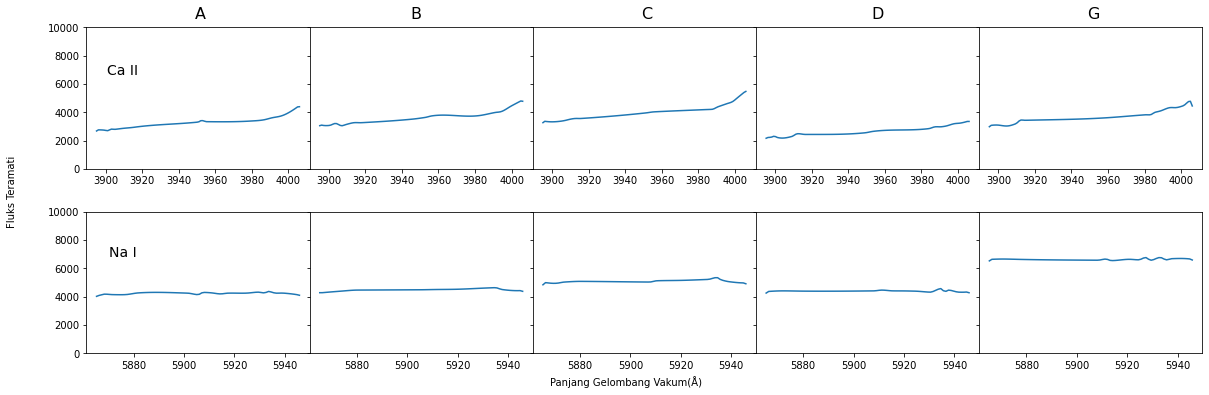

In [36]:
# (A) Ca II
wave0_A = spec_A.wave.coord() * u.Unit(spec_A.wave.unit) # Wavelength array
F0_A = spec_A.data * u.Unit(spec_A.unit) # Flux array
wave_A = wave0_A[65:175]/(1+z)
F_A = F0_A[65:175]
uncertain_A = uncertainty_A[65:175]

loaded_data_A = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_A.npz")
co_A = loaded_data_A["values"] * u.Unit(spec_A.unit)

# (A) Na I
wave_A2 = wave0_A[2000:2080]/(1+z)
F_A2 = F0_A[2000:2080]
uncertain_A2 = uncertainty_A[2000:2080]

loaded_data_A2 = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_A_Nai.npz")
co_A2 = loaded_data_A2["values"] * u.Unit(spec_A.unit)

# (B) Ca II
wave0_B = spec_B.wave.coord() * u.Unit(spec_B.wave.unit) # Wavelength array
F0_B = spec_B.data * u.Unit(spec_B.unit) # Flux array
wave_B = wave0_B[65:175]/(1+z)
F_B = F0_B[65:175]
uncertain_B = uncertainty_B[65:175]

loaded_data_B = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_B.npz")
co_B = loaded_data_B["values"] * u.Unit(spec_B.unit)

# (B) Na I
wave_B2 = wave0_B[2000:2080]/(1+z)
F_B2 = F0_B[2000:2080]
uncertain_B2 = uncertainty_B[2000:2080]

loaded_data_B2 = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_B_Nai.npz")
co_B2 = loaded_data_B2["values"] * u.Unit(spec_B.unit)

# (C) Ca II
wave0_C = spec_C.wave.coord() * u.Unit(spec_C.wave.unit) # Wavelength array
F0_C = spec_C.data * u.Unit(spec_C.unit) # Flux array
wave_C = wave0_C[65:175]/(1+z)
F_C = F0_C[65:175]
uncertain_C = uncertainty_C[65:175]

loaded_data_C = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_C.npz")
co_C = loaded_data_C["values"] * u.Unit(spec_C.unit)

# (C) Na I
wave_C2 = wave0_C[2000:2080]/(1+z)
F_C2 = F0_C[2000:2080]
uncertain_C2 = uncertainty_C[2000:2080]

loaded_data_C2 = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_C_Nai.npz")
co_C2 = loaded_data_C2["values"] * u.Unit(spec_C.unit)

# (D) Ca II
wave0_D = spec_D.wave.coord() * u.Unit(spec_D.wave.unit) # Wavelength array
F0_D = spec_D.data * u.Unit(spec_D.unit) # Flux array
wave_D = wave0_D[65:175]/(1+z)
F_D = F0_D[65:175]
uncertain_D = uncertainty_D[65:175]

loaded_data_D = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_D.npz")
co_D = loaded_data_D["values"] * u.Unit(spec_D.unit)

# (D) Na I
wave_D2 = wave0_D[2000:2080]/(1+z)
F_D2 = F0_D[2000:2080]
uncertain_D2 = uncertainty_D[2000:2080]

loaded_data_D2 = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_D_Nai.npz")
co_D2 = loaded_data_D2["values"] * u.Unit(spec_D.unit)

# (G) Ca II
wave0_G = spec_G.wave.coord() * u.Unit(spec_G.wave.unit) # Wavelength array
F0_G = spec_G.data * u.Unit(spec_G.unit) # Flux array
wave_G = wave0_G[65:175]/(1+z)
F_G = F0_G[65:175]
uncertain_G = uncertainty_G[65:175]

loaded_data_G = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_G.npz")
co_G = loaded_data_G["values"] * u.Unit(spec_G.unit)

# (G) Na I
wave_G2 = wave0_G[2000:2080]/(1+z)
F_G2 = F0_G[2000:2080]
uncertain_G2 = uncertainty_G[2000:2080]

loaded_data_G2 = np.load("D:\Datacube\WGD2038-4008\continuum_WGD2038-4008_G_Nai.npz")
co_G2 = loaded_data_G2["values"] * u.Unit(spec_G.unit)


# Plot
f, ax = plt.subplots(2, 5, sharey='row', figsize=(20,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wave_A, co_A)
ax[0,0].set_ylim(0, 10000)
ax[1,0].plot(wave_A2, co_A2)
ax[1,0].set_ylim(0, 10000)
ax[0,1].plot(wave_B, co_B)
ax[1,1].plot(wave_B2, co_B2)
ax[0,2].plot(wave_C, co_C)
ax[1,2].plot(wave_C2, co_C2)
ax[0,3].plot(wave_D, co_D)
ax[1,3].plot(wave_D2, co_D2)
ax[0,4].plot(wave_G, co_G)
ax[1,4].plot(wave_G2, co_G2)

f.text(0.15,0.77, 'Ca II', fontsize=14, ha='center')
f.text(0.15,0.35, 'Na I', fontsize=14, ha='center')

f.text(0.2, 0.91, 'A', va='center', fontsize=16)
f.text(0.35, 0.91, 'B', va='center', fontsize=16)
f.text(0.51, 0.91, 'C', va='center', fontsize=16)
f.text(0.67, 0.91, 'D', va='center', fontsize=16)
f.text(0.82, 0.91, 'G', va='center', fontsize=16)
f.text(0.5, 0.05, 'Panjang Gelombang Vakum(Å)', ha='center')
f.text(0.07, 0.5, 'Fluks Teramati', va='center', rotation='vertical')
plt.show()

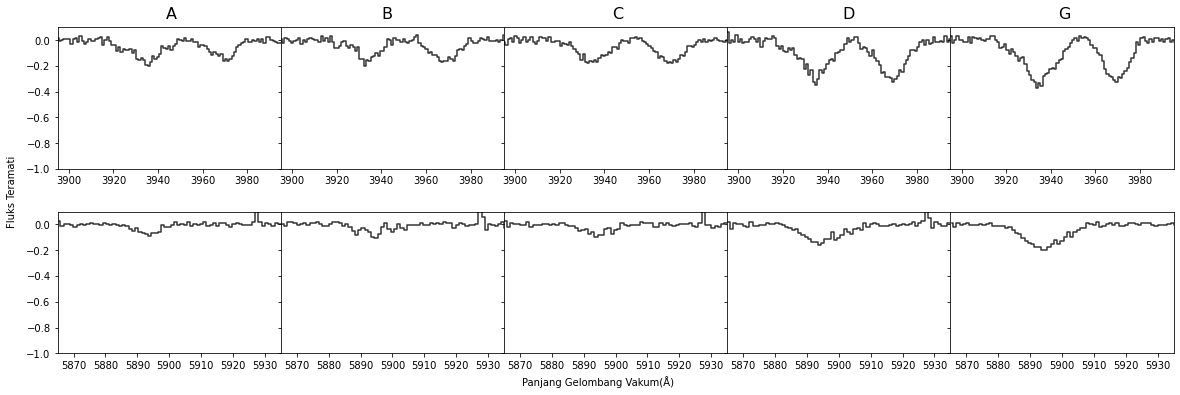

In [37]:
# (A) Ca II
wavelengths_A = wave_A.value
fluxes_A = (F_A.value / co_A.value) - 1
uncertainties_A = (uncertain_A.value / co_A.value)

# (A) Na I
wavelengths_A2 = wave_A2.value
fluxes_A2 = (F_A2.value / co_A2.value) - 1
uncertainties_A2 = (uncertain_A2.value / co_A2.value)

# (B) Ca II
wavelengths_B = wave_B.value
fluxes_B = (F_B.value / co_B.value) - 1
uncertainties_B = (uncertain_B.value / co_B.value)

# (B) Na I
wavelengths_B2 = wave_B2.value
fluxes_B2 = (F_B2.value / co_B2.value) - 1
uncertainties_B2 = (uncertain_B2.value / co_B2.value)

# (C)
wavelengths_C = wave_C.value
fluxes_C = (F_C.value / co_C.value) - 1
uncertainties_C = (uncertain_C.value / co_C.value)

# (C)
wavelengths_C2 = wave_C2.value
fluxes_C2 = (F_C2.value / co_C2.value) - 1
uncertainties_C2 = (uncertain_C2.value / co_C2.value)

# (D)
wavelengths_D = wave_D.value
fluxes_D = (F_D.value / co_D.value) - 1
uncertainties_D = (uncertain_D.value / co_D.value)

# (D)
wavelengths_D2 = wave_D2.value
fluxes_D2 = (F_D2.value / co_D2.value) - 1
uncertainties_D2 = (uncertain_D2.value / co_D2.value)

# (G)
wavelengths_G = wave_G.value
fluxes_G = (F_G.value / co_G.value) - 1
uncertainties_G = (uncertain_G.value / co_D.value)

# (G)
wavelengths_G2 = wave_G2.value
fluxes_G2 = (F_G2.value / co_G2.value) - 1
uncertainties_G2 = (uncertain_G2.value / co_G2.value)


f, ax = plt.subplots(2, 5, sharey='row', figsize=(20,6), gridspec_kw={'hspace': 0.3, 'wspace':0})

ax[0,0].plot(wavelengths_A, fluxes_A, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,0].set_ylim(-1.0,0.1)
ax[0,0].set_xlim(3895, 3995)

ax[1,0].plot(wavelengths_A2, fluxes_A2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,0].set_ylim(-1.0,0.1)
ax[1,0].set_xlim(5865, 5935)

ax[0,1].plot(wavelengths_B, fluxes_B, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,1].set_ylim(-1.0,0.1)
ax[0,1].set_xlim(3895, 3995)

ax[1,1].plot(wavelengths_B2, fluxes_B2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,1].set_xlim(5865, 5935)

ax[0,2].plot(wavelengths_C, fluxes_C, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,2].set_ylim(-1.0,0.1)
ax[0,2].set_xlim(3895, 3995)

ax[1,2].plot(wavelengths_C2, fluxes_C2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,2].set_xlim(5865, 5935)

ax[0,3].plot(wavelengths_D, fluxes_D, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,3].set_ylim(-1.0,0.1)
ax[0,3].set_xlim(3895, 3995)

ax[1,3].plot(wavelengths_D2, fluxes_D2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,3].set_xlim(5865, 5935)

ax[0,4].plot(wavelengths_G, fluxes_G, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0,4].set_ylim(-1.0,0.1)
ax[0,4].set_xlim(3895, 3995)

ax[1,4].plot(wavelengths_G2, fluxes_G2, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1,4].set_xlim(5865, 5935)

#f.text(0.15,0.77, 'Ca II', fontsize=14, ha='center')
#f.text(0.15,0.35, 'Na I', fontsize=14, ha='center')

f.text(0.2, 0.91, 'A', va='center', fontsize=16)
f.text(0.35, 0.91, 'B', va='center', fontsize=16)
f.text(0.51, 0.91, 'C', va='center', fontsize=16)
f.text(0.67, 0.91, 'D', va='center', fontsize=16)
f.text(0.82, 0.91, 'G', va='center', fontsize=16)
f.text(0.5, 0.05, 'Panjang Gelombang Vakum(Å)', ha='center')
f.text(0.09, 0.5, 'Fluks Teramati', va='center', rotation='vertical')
plt.show()

# 3. Equivalent Width

In [38]:
def compute_ew(wavelengths, flux, continuum_level, line_range):
    
    in_line_region = (wavelengths >= line_range[0]) & (wavelengths <= line_range[1])
    lam_line = wavelengths[in_line_region]
    flux_line = flux[in_line_region]

    absorption_mask = flux_line < continuum_level
    lam_absorb = lam_line[absorption_mask]
    flux_absorb = flux_line[absorption_mask]

    ew = - np.trapz(flux_absorb, lam_absorb)

    return ew

W_lambda_A = compute_ew(wavelengths_A, fluxes_A, continuum_level=0, line_range=(3913, 3955))
W_lambda_A2 = compute_ew(wavelengths_A2, fluxes_A2, continuum_level=0, line_range=(5880, 5910))
W_lambda_B = compute_ew(wavelengths_B, fluxes_B, continuum_level=0, line_range=(3913, 3955))
W_lambda_B2 = compute_ew(wavelengths_B2, fluxes_B2, continuum_level=0, line_range=(5880, 5910))
W_lambda_C = compute_ew(wavelengths_C, fluxes_C, continuum_level=0, line_range=(3913, 3955))
W_lambda_C2 = compute_ew(wavelengths_C2, fluxes_C2, continuum_level=0, line_range=(5880, 5910))
W_lambda_D = compute_ew(wavelengths_D, fluxes_D, continuum_level=0, line_range=(3913, 3955))
W_lambda_D2 = compute_ew(wavelengths_D2, fluxes_D2, continuum_level=0, line_range=(5880, 5910))
W_lambda_G = compute_ew(wavelengths_G, fluxes_G, continuum_level=0, line_range=(3913, 3955))
W_lambda_G2 = compute_ew(wavelengths_G2, fluxes_G2, continuum_level=0, line_range=(5880, 5910))

print(f"Equivalent Width (W) A Ca II λ3935: {W_lambda_A:.3f} Å")
print(f"Equivalent Width (W) A Na I: {W_lambda_A2:.3f} Å")
print(f"Equivalent Width (W) B Ca II λ3935: {W_lambda_B:.3f} Å")
print(f"Equivalent Width (W) B Na I: {W_lambda_B2:.3f} Å")
print(f"Equivalent Width (W) C Ca II λ3935: {W_lambda_C:.3f} Å")
print(f"Equivalent Width (W) C Na I: {W_lambda_C2:.3f} Å")
print(f"Equivalent Width (W) D Ca II λ3935: {W_lambda_D:.3f} Å")
print(f"Equivalent Width (W) D Na I: {W_lambda_D2:.3f} Å")
print(f"Equivalent Width (W) G Ca II λ3935: {W_lambda_G:.3f} Å")
print(f"Equivalent Width (W) G Na I: {W_lambda_G2:.3f} Å")

Equivalent Width (W) A Ca II λ3935: 3.008 Å
Equivalent Width (W) A Na I: 0.706 Å
Equivalent Width (W) B Ca II λ3935: 2.402 Å
Equivalent Width (W) B Na I: 0.931 Å
Equivalent Width (W) C Ca II λ3935: 2.751 Å
Equivalent Width (W) C Na I: 0.846 Å
Equivalent Width (W) D Ca II λ3935: 4.888 Å
Equivalent Width (W) D Na I: 1.998 Å
Equivalent Width (W) G Ca II λ3935: 5.751 Å
Equivalent Width (W) G Na I: 2.683 Å


# 4. Fitting Gaussian

In [39]:
def convolved_model_ca(x, amp, mu, sigma, amp2, sigma2):
    mu2 = mu + (lambda_3970 - lambda_3935)
    intrinsic_profile = (amp * np.exp(-0.5 * ((x - mu)/sigma)**2)) + (amp2 * np.exp(-0.5 * ((x - mu2)/sigma2)**2))
    return intrinsic_profile

In [40]:
# (A) Ca II
p0_A = [-0.2, 3935, 5, -0.2, 5]

popt_A, _ = curve_fit(convolved_model_ca, wavelengths_A, fluxes_A, p0=p0_A)
popt_A

array([-1.62151342e-01,  3.93436640e+03,  7.08248220e+00, -1.48422695e-01,
        5.21703267e+00])

Estimated Noise Standard Deviation: 1.284


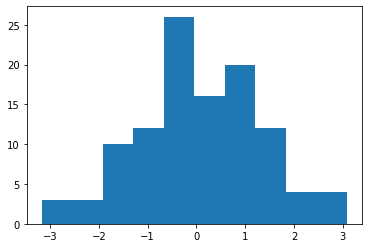

In [41]:
residuals_A = fluxes_A - convolved_model_ca(wavelengths_A, *popt_A)

plt.hist(residuals_A / uncertainties_A)

std_A = np.std(residuals_A / uncertainties_A)
print(f"Estimated Noise Standard Deviation: {std_A:.3f}")

Estimated Noise Standard Deviation: 1.065


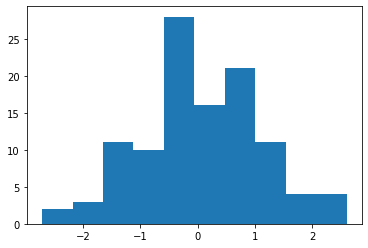

In [42]:
sigma_floor_A = 0.01
sigma_adjusted_A = np.sqrt(uncertainties_A**2 + sigma_floor_A**2)

plt.hist(residuals_A / sigma_adjusted_A)

std_A = np.std(residuals_A / sigma_adjusted_A)
print(f"Estimated Noise Standard Deviation: {std_A:.3f}")

In [43]:
chi_squared_A = np.sum((residuals_A / sigma_adjusted_A) ** 2)
dof_A = len(fluxes_A) - len(popt_A)

reduced_chi_squared_A = chi_squared_A / dof_A

print(f'Chi-squared: {chi_squared_A:.3f}')
print(f'Degree of freedom: {dof_A:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_A:.3f}')

Chi-squared: 125.169
Degree of freedom: 105.000
Reduced Chi-squared: 1.192


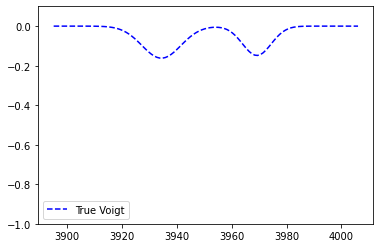

In [44]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_std2_3935) = popt_A
recovered_mu2_3935 = recovered_mu_3935 + (lambda_3970 - lambda_3935)

true_spectrum_A = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelengths_A, true_spectrum_A(wavelengths_A), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

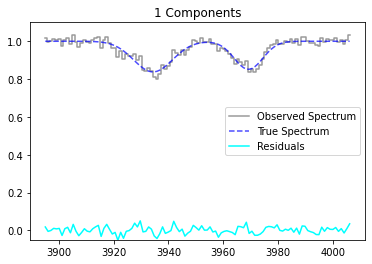

In [45]:
plt.figure()
plt.plot(wavelengths_A, fluxes_A+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_A, true_spectrum_A(wavelengths_A)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_A, residuals_A, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

(-2000.0, 2000.0)

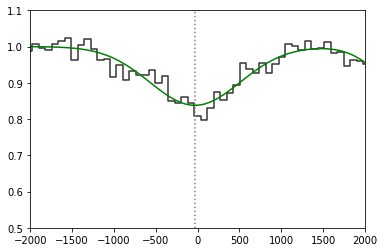

In [46]:
v_3935_A = c_kms * (wavelengths_A - lambda_3935) / lambda_3935

vline_3935_A = c_kms * (recovered_mu_3935 - lambda_3935) / lambda_3935

plt.plot(v_3935_A, fluxes_A+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_A, true_spectrum_A(wavelengths_A)+1, color='green')
plt.axvline(vline_3935_A, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(-2000,2000)

In [47]:
# (B) Ca II
p0_B = [-0.2, 3935, 5, -0.2, 5]

popt_B, _ = curve_fit(convolved_model_ca, wavelengths_B, fluxes_B, p0=p0_B)
popt_B

array([-1.59748384e-01,  3.93379033e+03,  4.96600377e+00, -1.66550921e-01,
        5.64704078e+00])

Estimated Noise Standard Deviation: 1.433


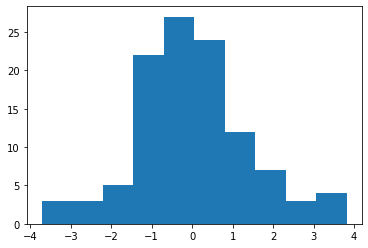

In [48]:
residuals_B = fluxes_B - convolved_model_ca(wavelengths_B, *popt_B)

plt.hist(residuals_B / uncertainties_B)

std_B = np.std(residuals_B / uncertainties_B)
print(f"Estimated Noise Standard Deviation: {std_B:.3f}")

Estimated Noise Standard Deviation: 1.160


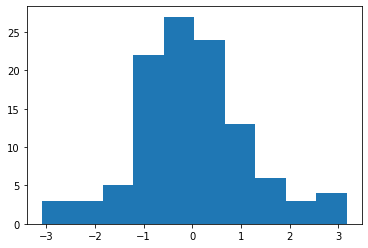

In [49]:
sigma_floor_B = 0.01
sigma_adjusted_B = np.sqrt(uncertainties_B**2 + sigma_floor_B**2)

plt.hist(residuals_B / sigma_adjusted_B)

std_B = np.std(residuals_B / sigma_adjusted_B)
print(f"Estimated Noise Standard Deviation: {std_B:.3f}")

In [50]:
chi_squared_B = np.sum((residuals_B / sigma_adjusted_B) ** 2)
dof_B = len(fluxes_B) - len(popt_B)

reduced_chi_squared_B = chi_squared_B / dof_B

print(f'Chi-squared: {chi_squared_B:.3f}')
print(f'Degree of freedom: {dof_B:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_B:.3f}')

Chi-squared: 147.909
Degree of freedom: 105.000
Reduced Chi-squared: 1.409


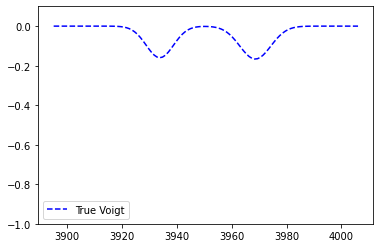

In [51]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_std2_3935) = popt_B
recovered_mu2_3935 = recovered_mu_3935 + (lambda_3970 - lambda_3935)

true_spectrum_B = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelengths_B, true_spectrum_B(wavelengths_B), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

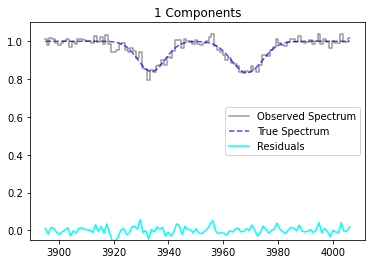

In [52]:
plt.figure()
plt.plot(wavelengths_B, fluxes_B+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_B, true_spectrum_B(wavelengths_B)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_B, residuals_B, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

(-2000.0, 2000.0)

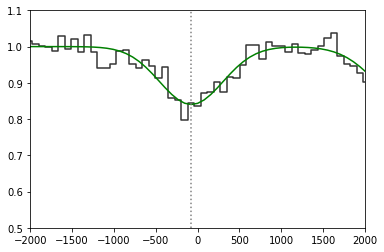

In [53]:
v_3935_B = c_kms * (wavelengths_B - lambda_3935) / lambda_3935

vline_3935_B = c_kms * (recovered_mu_3935 - lambda_3935) / lambda_3935

plt.plot(v_3935_B, fluxes_B+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_B, true_spectrum_B(wavelengths_B)+1, color='green')
plt.axvline(vline_3935_B, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(-2000,2000)

In [54]:
# (C) Ca II
p0_C = [-0.2, 3935, 5, -0.2, 5]

popt_C, _ = curve_fit(convolved_model_ca, wavelengths_C, fluxes_C, p0=p0_C)
popt_C

array([-1.69192681e-01,  3.93491609e+03,  6.39040822e+00, -1.77170486e-01,
        5.59560406e+00])

Estimated Noise Standard Deviation: 1.157


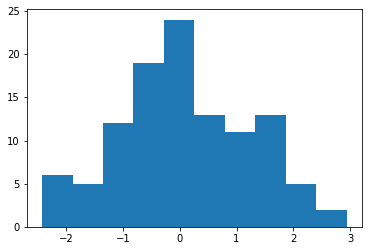

In [55]:
residuals_C = fluxes_C - convolved_model_ca(wavelengths_C, *popt_C)

plt.hist(residuals_C / uncertainties_C)

std_C = np.std(residuals_C / uncertainties_C)
print(f"Estimated Noise Standard Deviation: {std_C:.3f}")

Estimated Noise Standard Deviation: 1.000


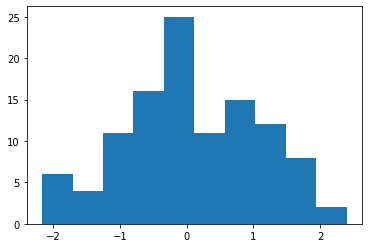

In [56]:
sigma_floor_C = 0.00758
sigma_adjusted_C = np.sqrt(uncertainties_C**2 + sigma_floor_C**2)

plt.hist(residuals_C / sigma_adjusted_C)

std_C = np.std(residuals_C / sigma_adjusted_C)
print(f"Estimated Noise Standard Deviation: {std_C:.3f}")

In [57]:
chi_squared_C = np.sum((residuals_C / sigma_adjusted_C) ** 2)
dof_C = len(fluxes_C) - len(popt_C)

reduced_chi_squared_C = chi_squared_C / dof_C

print(f'Chi-squared: {chi_squared_C:.3f}')
print(f'Degree of freedom: {dof_C:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_C:.3f}')

Chi-squared: 110.723
Degree of freedom: 105.000
Reduced Chi-squared: 1.055


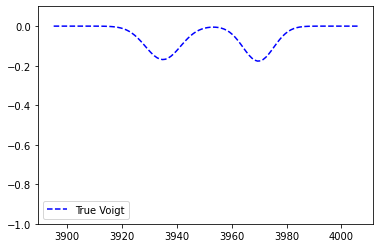

In [58]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_std2_3935) = popt_C
recovered_mu2_3935 = recovered_mu_3935 + (lambda_3970 - lambda_3935)

true_spectrum_C = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelengths_C, true_spectrum_C(wavelengths_C), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

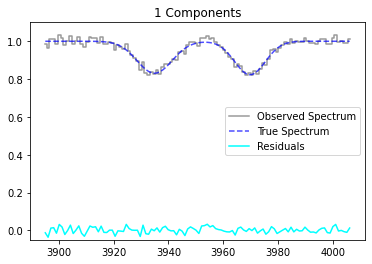

In [59]:
plt.figure()
plt.plot(wavelengths_C, fluxes_C+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_C, true_spectrum_C(wavelengths_C)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_C, residuals_C, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

(-2000.0, 2000.0)

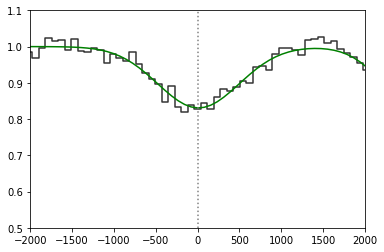

In [60]:
v_3935_C = c_kms * (wavelengths_C - lambda_3935) / lambda_3935

vline_3935_C = c_kms * (recovered_mu_3935 - lambda_3935) / lambda_3935

plt.plot(v_3935_C, fluxes_C+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_C, true_spectrum_C(wavelengths_C)+1, color='green')
plt.axvline(vline_3935_C, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(-2000,2000)

In [61]:
# (D) Ca II
p0_D = [-0.2, 3935, 2, -0.2, 2]

popt_D, _ = curve_fit(convolved_model_ca, wavelengths_D, fluxes_D, p0=p0_D)
popt_D

array([-2.79389533e-01,  3.93414874e+03,  6.75720195e+00, -3.02948136e-01,
        6.03568426e+00])

Estimated Noise Standard Deviation: 1.384


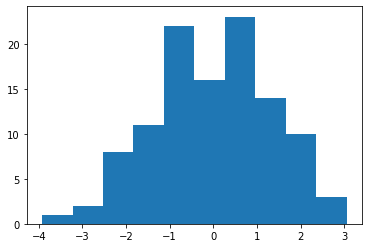

In [62]:
residuals_D = fluxes_D - convolved_model_ca(wavelengths_D, *popt_D)

plt.hist(residuals_D / uncertainties_D)

std_D = np.std(residuals_D / uncertainties_D)
print(f"Estimated Noise Standard Deviation: {std_D:.3f}")

Estimated Noise Standard Deviation: 1.210


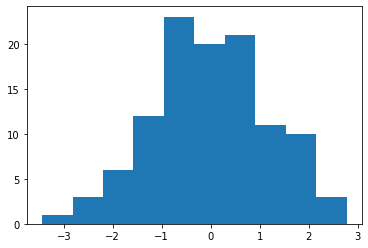

In [63]:
sigma_floor_D = 0.01
sigma_adjusted_D = np.sqrt(uncertainties_D**2 + sigma_floor_D**2)

plt.hist(residuals_D / sigma_adjusted_D)

std_D = np.std(residuals_D / sigma_adjusted_D)
print(f"Estimated Noise Standard Deviation: {std_D:.3f}")

In [64]:
chi_squared_D = np.sum((residuals_D / sigma_adjusted_D) ** 2)
dof_D = len(fluxes_D) - len(popt_D)

reduced_chi_squared_D = chi_squared_D / dof_D

print(f'Chi-squared: {chi_squared_D:.3f}')
print(f'Degree of freedom: {dof_D:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_D:.3f}')

Chi-squared: 161.015
Degree of freedom: 105.000
Reduced Chi-squared: 1.533


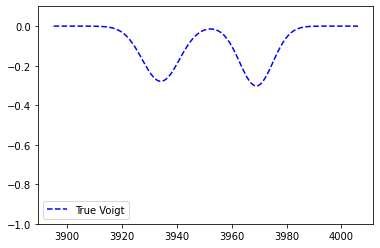

In [65]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_std2_3935) = popt_D
recovered_mu2_3935 = recovered_mu_3935 + (lambda_3970 - lambda_3935)

true_spectrum_D = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelengths_D, true_spectrum_D(wavelengths_D), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

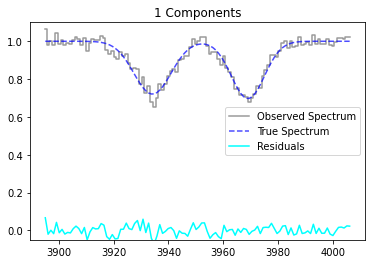

In [66]:
plt.figure()
plt.plot(wavelengths_D, fluxes_D+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_D, true_spectrum_D(wavelengths_D)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_D, residuals_D, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

(-2000.0, 2000.0)

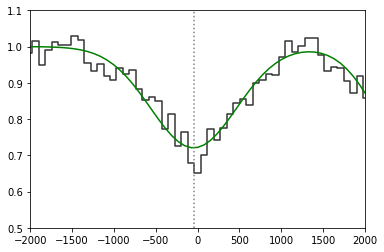

In [67]:
v_3935_D = c_kms * (wavelengths_D - lambda_3935) / lambda_3935

vline_3935_D = c_kms * (recovered_mu_3935 - lambda_3935) / lambda_3935

plt.plot(v_3935_D, fluxes_D+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_D, true_spectrum_D(wavelengths_D)+1, color='green')
plt.axvline(vline_3935_D, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(-2000,2000)

In [68]:
# (G) Ca II
p0_G = [-0.2, 3935, 2, -0.2, 2]

popt_G, _ = curve_fit(convolved_model_ca, wavelengths_G, fluxes_G, p0=p0_G)
popt_G

array([-3.23695038e-01,  3.93458126e+03,  7.00174204e+00, -3.22928478e-01,
        5.08152754e+00])

Estimated Noise Standard Deviation: 1.186


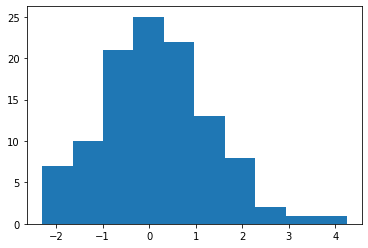

In [69]:
residuals_G = fluxes_G - convolved_model_ca(wavelengths_G, *popt_G)

plt.hist(residuals_G / uncertainties_G)

std_G = np.std(residuals_G / uncertainties_G)
print(f"Estimated Noise Standard Deviation: {std_G:.3f}")

Estimated Noise Standard Deviation: 1.048


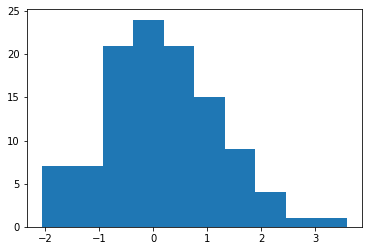

In [70]:
sigma_floor_G = 0.01
sigma_adjusted_G = np.sqrt(uncertainties_G**2 + sigma_floor_G**2)

plt.hist(residuals_G / sigma_adjusted_G)

std_G = np.std(residuals_G / sigma_adjusted_G)
print(f"Estimated Noise Standard Deviation: {std_G:.3f}")

In [71]:
chi_squared_G = np.sum((residuals_G / sigma_adjusted_G) ** 2)
dof_G = len(fluxes_G) - len(popt_G)

reduced_chi_squared_G = chi_squared_G / dof_G

print(f'Chi-squared: {chi_squared_G:.3f}')
print(f'Degree of freedom: {dof_G:.3f}')
print(f'Reduced Chi-squared: {reduced_chi_squared_G:.3f}')

Chi-squared: 123.373
Degree of freedom: 105.000
Reduced Chi-squared: 1.175


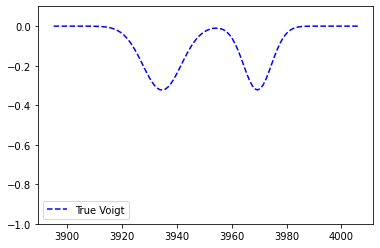

In [72]:
(recovered_amp_3935, recovered_mu_3935, recovered_std_3935, recovered_amp2_3935, recovered_std2_3935) = popt_G
recovered_mu2_3935 = recovered_mu_3935 + (lambda_3970 - lambda_3935)

true_spectrum_G = (Gaussian1D(amplitude=recovered_amp_3935, mean=recovered_mu_3935, stddev=recovered_std_3935)
                  + Gaussian1D(amplitude=recovered_amp2_3935, mean=recovered_mu2_3935, stddev=recovered_std2_3935))

plt.plot(wavelengths_G, true_spectrum_G(wavelengths_G), '--', label="True Voigt", color='blue')
#plt.xlim(2780, 2820)
plt.ylim(-1, 0.1)
plt.legend()

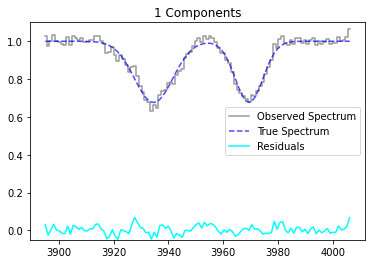

In [73]:
plt.figure()
plt.plot(wavelengths_G, fluxes_G+1, label="Observed Spectrum", color='gray', alpha= 0.8, drawstyle='steps-mid')
plt.plot(wavelengths_G, true_spectrum_G(wavelengths_G)+1, '--', label="True Spectrum", color='blue',alpha=0.7)
plt.plot(wavelengths_G, residuals_G, label='Residuals', color='cyan')

plt.title("1 Components")
plt.ylim(-0.05,1.1)
plt.legend()

(-2000.0, 2000.0)

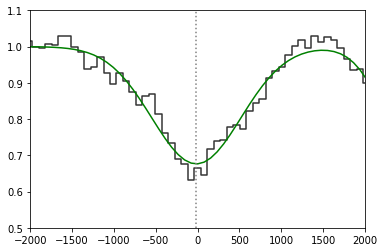

In [74]:
v_3935_G = c_kms * (wavelengths_G - lambda_3935) / lambda_3935

vline_3935_G = c_kms * (recovered_mu_3935 - lambda_3935) / lambda_3935

plt.plot(v_3935_G, fluxes_G+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_G, true_spectrum_G(wavelengths_G)+1, color='green')
plt.axvline(vline_3935_G, color="grey", linestyle=":")
plt.ylim(0.5, 1.1)
plt.xlim(-2000,2000)

# 6. Monte Carlo

In [89]:
sim_W_A = []
sim_W_A2 = []
sim_W_B = []
sim_W_B2 = []
sim_W_C = []
sim_W_C2 = []
sim_W_D = []
sim_W_D2 = []
sim_W_G = []
sim_W_G2 = []

sim_amp_A = []
sim_mu_A = []
sim_std_A = []
sim_amp_B = []
sim_mu_B = []
sim_std_B = []
sim_amp_C = []
sim_mu_C = []
sim_std_C = []
sim_amp_D = []
sim_mu_D = []
sim_std_D = []
sim_amp_G = []
sim_mu_G = []
sim_std_G = []

sim_chi_A = []
sim_reduced_chi_A = []
sim_chi_B = []
sim_reduced_chi_B = []
sim_chi_C = []
sim_reduced_chi_C = []
sim_chi_D = []
sim_reduced_chi_D = []
sim_chi_G = []
sim_reduced_chi_G = []

n_sim = 1000

for x in range(0, n_sim):
    sim_fluxes_A = fluxes_A + np.random.normal(0, uncertainties_A)
    sim_fluxes_A2 = fluxes_A2 + np.random.normal(0, uncertainties_A2)
    sim_fluxes_B = fluxes_B + np.random.normal(0, uncertainties_B)
    sim_fluxes_B2 = fluxes_B2 + np.random.normal(0, uncertainties_B2)
    sim_fluxes_C = fluxes_C + np.random.normal(0, uncertainties_C)
    sim_fluxes_C2 = fluxes_C2 + np.random.normal(0, uncertainties_C2)
    sim_fluxes_D = fluxes_D + np.random.normal(0, uncertainties_D)
    sim_fluxes_D2 = fluxes_D2 + np.random.normal(0, uncertainties_D2)
    sim_fluxes_G = fluxes_G + np.random.normal(0, uncertainties_G)
    sim_fluxes_G2 = fluxes_G2 + np.random.normal(0, uncertainties_G2)

    W_lambda_A = compute_ew(wavelengths_A, sim_fluxes_A, continuum_level=0, line_range=(3913, 3955))
    W_lambda_A2 = compute_ew(wavelengths_A2, sim_fluxes_A2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_B = compute_ew(wavelengths_B, sim_fluxes_B, continuum_level=0, line_range=(3913, 3955))
    W_lambda_B2 = compute_ew(wavelengths_B2, sim_fluxes_B2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_C = compute_ew(wavelengths_C, sim_fluxes_C, continuum_level=0, line_range=(3913, 3955))
    W_lambda_C2 = compute_ew(wavelengths_C2, sim_fluxes_C2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_D = compute_ew(wavelengths_D, sim_fluxes_D, continuum_level=0, line_range=(3913, 3955))
    W_lambda_D2 = compute_ew(wavelengths_D2, sim_fluxes_D2, continuum_level=0, line_range=(5880, 5910))
    W_lambda_G = compute_ew(wavelengths_G, sim_fluxes_G, continuum_level=0, line_range=(3913, 3955))
    W_lambda_G2 = compute_ew(wavelengths_G2, sim_fluxes_G2, continuum_level=0, line_range=(5880, 5910))
    
    sim_W_A.append(W_lambda_A)
    sim_W_A2.append(W_lambda_A2)
    sim_W_B.append(W_lambda_B)
    sim_W_B2.append(W_lambda_B2)
    sim_W_C.append(W_lambda_C)
    sim_W_C2.append(W_lambda_C2)
    sim_W_D.append(W_lambda_D)
    sim_W_D2.append(W_lambda_D2)
    sim_W_G.append(W_lambda_G)
    sim_W_G2.append(W_lambda_G2)
    
    popt_A, _ = curve_fit(convolved_model_ca, wavelengths_A, sim_fluxes_A, p0=p0_A, 
                          sigma=sigma_adjusted_A, absolute_sigma=True, maxfev=5000)
    recovered_amp_A, recovered_mu_3935_A, recovered_stddev_A, recovered_amp2_A, recovered_stddev2_A = popt_A
    popt_B, _ = curve_fit(convolved_model_ca, wavelengths_B, sim_fluxes_B, p0=p0_B, 
                          sigma=sigma_adjusted_B, absolute_sigma=True, maxfev=5000)
    recovered_amp_B, recovered_mu_3935_B, recovered_stddev_B, recovered_amp2_B, recovered_stddev2_B = popt_B
    popt_C, _ = curve_fit(convolved_model_ca, wavelengths_C, sim_fluxes_C, p0=p0_C, 
                          sigma=sigma_adjusted_C, absolute_sigma=True, maxfev=5000)
    recovered_amp_C, recovered_mu_3935_C, recovered_stddev_C, recovered_amp2_C, recovered_stddev2_C = popt_C
    popt_D, _ = curve_fit(convolved_model_ca, wavelengths_D, sim_fluxes_D, p0=p0_D, 
                          sigma=sigma_adjusted_D, absolute_sigma=True, maxfev=5000)
    recovered_amp_D, recovered_mu_3935_D, recovered_stddev_D, recovered_amp2_D, recovered_stddev2_D = popt_D
    popt_G, _ = curve_fit(convolved_model_ca, wavelengths_G, sim_fluxes_G, p0=p0_G, 
                          sigma=sigma_adjusted_G, absolute_sigma=True, maxfev=5000)
    recovered_amp_G, recovered_mu_3935_G, recovered_stddev_G, recovered_amp2_G, recovered_stddev2_G = popt_G
    
    sim_amp_A.append(recovered_amp_A)
    sim_mu_A.append(recovered_mu_3935_A)
    sim_std_A.append(recovered_stddev_A)
    sim_amp_B.append(recovered_amp_B)
    sim_mu_B.append(recovered_mu_3935_B)
    sim_std_B.append(recovered_stddev_B)
    sim_amp_C.append(recovered_amp_C)
    sim_mu_C.append(recovered_mu_3935_C)
    sim_std_C.append(recovered_stddev_C)
    sim_amp_D.append(recovered_amp_D)
    sim_mu_D.append(recovered_mu_3935_D)
    sim_std_D.append(recovered_stddev_D)
    sim_amp_G.append(recovered_amp_G)
    sim_mu_G.append(recovered_mu_3935_G)
    sim_std_G.append(recovered_stddev_G)
    
    residuals_A = sim_fluxes_A - convolved_model_ca(wavelengths_A, *popt_A)
    chi_squared_A = np.sum((residuals_A / sigma_adjusted_A) ** 2)
    dof_A = len(sim_fluxes_A) - len(popt_A)
    reduced_chi_squared_A = chi_squared_A / dof_A
    
    residuals_B = sim_fluxes_B - convolved_model_ca(wavelengths_B, *popt_B)
    chi_squared_B = np.sum((residuals_B / sigma_adjusted_B) ** 2)
    dof_B = len(sim_fluxes_B) - len(popt_B)
    reduced_chi_squared_B = chi_squared_B / dof_B
    
    residuals_C = sim_fluxes_C - convolved_model_ca(wavelengths_C, *popt_C)
    chi_squared_C = np.sum((residuals_C / sigma_adjusted_C) ** 2)
    dof_C = len(sim_fluxes_C) - len(popt_C)
    reduced_chi_squared_C = chi_squared_C / dof_C
    
    residuals_D = sim_fluxes_D - convolved_model_ca(wavelengths_D, *popt_D)
    chi_squared_D = np.sum((residuals_D / sigma_adjusted_D) ** 2)
    dof_D = len(sim_fluxes_D) - len(popt_D)
    reduced_chi_squared_D = chi_squared_D / dof_D
    
    residuals_G = sim_fluxes_G - convolved_model_ca(wavelengths_G, *popt_G)
    chi_squared_G = np.sum((residuals_G / sigma_adjusted_G) ** 2)
    dof_G = len(sim_fluxes_G) - len(popt_G)
    reduced_chi_squared_G = chi_squared_G / dof_G

print("Simulation is done")

Simulation is done


In [90]:
sim_W_A = np.array(sim_W_A)
W_A_mean = np.mean(sim_W_A)
W_A_std = np.std(sim_W_A)

sim_W_A2 = np.array(sim_W_A2)
W_A2_mean = np.mean(sim_W_A2)
W_A2_std = np.std(sim_W_A2)

sim_W_B_B = np.array(sim_W_B)
W_B_mean = np.mean(sim_W_B)
W_B_std = np.std(sim_W_B)

sim_W_B2 = np.array(sim_W_B2)
W_B2_mean = np.mean(sim_W_B2)
W_B2_std = np.std(sim_W_B2)

sim_W_C = np.array(sim_W_C)
W_C_mean = np.mean(sim_W_C)
W_C_std = np.std(sim_W_C)

sim_W_C2 = np.array(sim_W_C2)
W_C2_mean = np.mean(sim_W_C2)
W_C2_std = np.std(sim_W_C2)

sim_W_D = np.array(sim_W_D)
W_D_mean = np.mean(sim_W_D)
W_D_std = np.std(sim_W_D)

sim_W_D2 = np.array(sim_W_D2)
W_D2_mean = np.mean(sim_W_D2)
W_D2_std = np.std(sim_W_D2)

sim_W_G = np.array(sim_W_G)
W_G_mean = np.mean(sim_W_G)
W_G_std = np.std(sim_W_G)

sim_W_G2 = np.array(sim_W_G2)
W_G2_mean = np.mean(sim_W_G2)
W_G2_std = np.std(sim_W_G2)

print(f"Equivalent Width A Ca II λ3935: {W_A_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_A_std:.3f} Angstrom")
print(f"Equivalent Width A Na I: {W_A2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_A2_std:.3f} Angstrom")
print(f"Equivalent Width B Ca II λ3935: {W_B_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_B_std:.3f} Angstrom")
print(f"Equivalent Width B Na I: {W_B2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_B2_std:.3f} Angstrom")
print(f"Equivalent Width C Ca II λ3935: {W_C_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_C_std:.3f} Angstrom")
print(f"Equivalent Width C Na I: {W_C2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_C2_std:.3f} Angstrom")
print(f"Equivalent Width D Ca II λ3935: {W_D_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_D_std:.3f} Angstrom")
print(f"Equivalent Width D Na I: {W_D2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_D2_std:.3f} Angstrom")
print(f"Equivalent Width G Ca II λ3935: {W_G_mean:.3f} Angstrom")
print(f"EW λ3935 errors(1σ): {W_G_std:.3f} Angstrom")
print(f"Equivalent Width G Na I: {W_G2_mean:.3f} Angstrom")
print(f"EW λ5892 errors(1σ): {W_G2_std:.3f} Angstrom")

Equivalent Width A Ca II λ3935: 3.053 Angstrom
EW λ3935 errors(1σ): 0.108 Angstrom
Equivalent Width A Na I: 0.807 Angstrom
EW λ5892 errors(1σ): 0.059 Angstrom
Equivalent Width B Ca II λ3935: 2.410 Angstrom
EW λ3935 errors(1σ): 0.108 Angstrom
Equivalent Width B Na I: 0.957 Angstrom
EW λ5892 errors(1σ): 0.061 Angstrom
Equivalent Width C Ca II λ3935: 2.826 Angstrom
EW λ3935 errors(1σ): 0.085 Angstrom
Equivalent Width C Na I: 0.889 Angstrom
EW λ5892 errors(1σ): 0.052 Angstrom
Equivalent Width D Ca II λ3935: 4.959 Angstrom
EW λ3935 errors(1σ): 0.135 Angstrom
Equivalent Width D Na I: 2.002 Angstrom
EW λ5892 errors(1σ): 0.060 Angstrom
Equivalent Width G Ca II λ3935: 5.785 Angstrom
EW λ3935 errors(1σ): 0.132 Angstrom
Equivalent Width G Na I: 2.696 Angstrom
EW λ5892 errors(1σ): 0.041 Angstrom


In [91]:
sim_amp_A = np.array(sim_amp_A)
sim_amp_A_mean = np.mean(sim_amp_A)
sim_amp_A_std = np.std(sim_amp_A)

sim_amp_B = np.array(sim_amp_B)
sim_amp_B_mean = np.mean(sim_amp_B)
sim_amp_B_std = np.std(sim_amp_B)

sim_amp_C = np.array(sim_amp_C)
sim_amp_C_mean = np.mean(sim_amp_C)
sim_amp_C_std = np.std(sim_amp_C)

sim_amp_D = np.array(sim_amp_D)
sim_amp_D_mean = np.mean(sim_amp_D)
sim_amp_D_std = np.std(sim_amp_D)

sim_amp_G = np.array(sim_amp_G)
sim_amp_G_mean = np.mean(sim_amp_G)
sim_amp_G_std = np.std(sim_amp_G)

print(f"Fitted Amplitude A: {sim_amp_A_mean:.3f} ± {sim_amp_A_std:.3f}")
print(f"Fitted Amplitude B: {sim_amp_B_mean:.3f} ± {sim_amp_B_std:.3f}")
print(f"Fitted Amplitude C: {sim_amp_C_mean:.3f} ± {sim_amp_C_std:.3f}")
print(f"Fitted Amplitude D: {sim_amp_D_mean:.3f} ± {sim_amp_D_std:.3f}")
print(f"Fitted Amplitude G: {sim_amp_G_mean:.3f} ± {sim_amp_G_std:.3f}")

Fitted Amplitude A: -0.164 ± 0.005
Fitted Amplitude B: -0.161 ± 0.006
Fitted Amplitude C: -0.170 ± 0.005
Fitted Amplitude D: -0.280 ± 0.007
Fitted Amplitude G: -0.325 ± 0.007


In [92]:
sim_mu_A = np.array(sim_mu_A)
sim_mu_A_mean = np.mean(sim_mu_A)
sim_mu_A_std = np.std(sim_mu_A)

sim_mu_B = np.array(sim_mu_B)
sim_mu_B_mean = np.mean(sim_mu_B)
sim_mu_B_std = np.std(sim_mu_B)

sim_mu_C = np.array(sim_mu_C)
sim_mu_C_mean = np.mean(sim_mu_C)
sim_mu_C_std = np.std(sim_mu_C)

sim_mu_D = np.array(sim_mu_D)
sim_mu_D_mean = np.mean(sim_mu_D)
sim_mu_D_std = np.std(sim_mu_D)

sim_mu_G = np.array(sim_mu_G)
sim_mu_G_mean = np.mean(sim_mu_G)
sim_mu_G_std = np.std(sim_mu_G)

print(f"Fitted Mu A: {sim_mu_A_mean:.3f} ± {sim_mu_A_std:.3f} Angstrom")
print(f"Fitted Mu B: {sim_mu_B_mean:.3f} ± {sim_mu_B_std:.3f} Angstrom")
print(f"Fitted Mu C: {sim_mu_C_mean:.3f} ± {sim_mu_C_std:.3f} Angstrom")
print(f"Fitted Mu D: {sim_mu_D_mean:.3f} ± {sim_mu_D_std:.3f} Angstrom")
print(f"Fitted Mu G: {sim_mu_G_mean:.3f} ± {sim_mu_G_std:.3f} Angstrom")

Fitted Mu A: 3934.379 ± 0.191 Angstrom
Fitted Mu B: 3933.778 ± 0.155 Angstrom
Fitted Mu C: 3934.915 ± 0.139 Angstrom
Fitted Mu D: 3934.110 ± 0.121 Angstrom
Fitted Mu G: 3934.552 ± 0.108 Angstrom


In [93]:
sim_std_A = np.array(sim_std_A)
sim_std_A_mean = np.mean(sim_std_A)
sim_std_A_std = np.std(sim_std_A)

sim_std_B = np.array(sim_std_B)
sim_std_B_mean = np.mean(sim_std_B)
sim_std_B_std = np.std(sim_std_B)

sim_std_C = np.array(sim_std_C)
sim_std_C_mean = np.mean(sim_std_C)
sim_std_C_std = np.std(sim_std_C)

sim_std_D = np.array(sim_std_D)
sim_std_D_mean = np.mean(sim_std_D)
sim_std_D_std = np.std(sim_std_D)

sim_std_G = np.array(sim_std_G)
sim_std_G_mean = np.mean(sim_std_G)
sim_std_G_std = np.std(sim_std_G)

print(f"Fitted Dispersion A: {sim_std_A_mean:.3f} ± {sim_std_A_std:.3f} Angstrom")
print(f"Fitted Dispersion B: {sim_std_B_mean:.3f} ± {sim_std_B_std:.3f} Angstrom")
print(f"Fitted Dispersion C: {sim_std_C_mean:.3f} ± {sim_std_C_std:.3f} Angstrom")
print(f"Fitted Dispersion D: {sim_std_D_mean:.3f} ± {sim_std_D_std:.3f} Angstrom")
print(f"Fitted Dispersion G: {sim_std_G_mean:.3f} ± {sim_std_G_std:.3f} Angstrom")

Fitted Dispersion A: 7.031 ± 0.309 Angstrom
Fitted Dispersion B: 4.974 ± 0.284 Angstrom
Fitted Dispersion C: 6.387 ± 0.207 Angstrom
Fitted Dispersion D: 6.770 ± 0.221 Angstrom
Fitted Dispersion G: 6.996 ± 0.170 Angstrom


# 7. Parameter Estimation

In [94]:
v_A = ((sim_mu_A_mean - lambda_3935) / lambda_3935) * c_kms
v_B = ((sim_mu_B_mean - lambda_3935) / lambda_3935) * c_kms
v_C = ((sim_mu_C_mean - lambda_3935) / lambda_3935) * c_kms
v_D = ((sim_mu_D_mean - lambda_3935) / lambda_3935) * c_kms
v_G = ((sim_mu_G_mean - lambda_3935) / lambda_3935) * c_kms

err_v_A = (c_kms / lambda_3935) * sim_mu_A_std
err_v_B = (c_kms / lambda_3935) * sim_mu_B_std
err_v_C = (c_kms / lambda_3935) * sim_mu_C_std
err_v_D = (c_kms / lambda_3935) * sim_mu_D_std
err_v_G = (c_kms / lambda_3935) * sim_mu_G_std

print(f"System Velocity A: {v_A:.3f} ± {sim_std_A_std:.3f} km/s")
print(f"System Velocity B: {v_B:.3f} ± {sim_std_B_std:.3f} km/s")
print(f"System Velocity C: {v_C:.3f} ± {sim_std_C_std:.3f} km/s")
print(f"System Velocity D: {v_D:.3f} ± {sim_std_D_std:.3f} km/s")
print(f"System Velocity G: {v_G:.3f} ± {sim_std_G_std:.3f} km/s")

System Velocity A: -30.358 ± 0.309 km/s
System Velocity B: -76.107 ± 0.284 km/s
System Velocity C: 10.529 ± 0.207 km/s
System Velocity D: -50.812 ± 0.221 km/s
System Velocity G: -17.140 ± 0.170 km/s


In [95]:
sigma_A = (sim_std_A_mean / sim_mu_A_mean) * c_kms
sigma_B = (sim_std_B_mean / sim_mu_B_mean) * c_kms
sigma_C = (sim_std_C_mean / sim_mu_C_mean) * c_kms
sigma_D = (sim_std_D_mean / sim_mu_D_mean) * c_kms
sigma_G = (sim_std_G_mean / sim_mu_G_mean) * c_kms

err_sigma_A = sigma_A * ((sim_std_A_std / sim_std_A_mean)**2 + (sim_mu_A_std / sim_mu_A_mean)**2)**0.5
err_sigma_B = sigma_B * ((sim_std_B_std / sim_std_B_mean)**2 + (sim_mu_B_std / sim_mu_B_mean)**2)**0.5
err_sigma_C = sigma_C * ((sim_std_C_std / sim_std_C_mean)**2 + (sim_mu_C_std / sim_mu_C_mean)**2)**0.5
err_sigma_D = sigma_D * ((sim_std_D_std / sim_std_D_mean)**2 + (sim_mu_D_std / sim_mu_D_mean)**2)**0.5
err_sigma_G = sigma_G * ((sim_std_G_std / sim_std_G_mean)**2 + (sim_mu_G_std / sim_mu_G_mean)**2)**0.5

print(f"Velocity Dispersion A: {sigma_A/2:.3f} ± {err_sigma_A/2:.3f} km/s")
print(f"Velocity Dispersion B: {sigma_B/2:.3f} ± {err_sigma_B/2:.3f} km/s")
print(f"Velocity Dispersion C: {sigma_C/2:.3f} ± {err_sigma_C/2:.3f} km/s")
print(f"Velocity Dispersion D: {sigma_D/2:.3f} ± {err_sigma_D/2:.3f} km/s")
print(f"Velocity Dispersion G: {sigma_G/2:.3f} ± {err_sigma_G/2:.3f} km/s")

Velocity Dispersion A: 267.874 ± 11.779 km/s
Velocity Dispersion B: 189.545 ± 10.836 km/s
Velocity Dispersion C: 243.299 ± 7.895 km/s
Velocity Dispersion D: 257.952 ± 8.433 km/s
Velocity Dispersion G: 266.520 ± 6.494 km/s


# 8. Relative Velocity Plot

In [96]:
v_3935_A = c_kms * (wavelengths_A - lambda_3935) / lambda_3935
v_3935_B = c_kms * (wavelengths_B - lambda_3935) / lambda_3935
v_3935_C = c_kms * (wavelengths_C - lambda_3935) / lambda_3935
v_3935_D = c_kms * (wavelengths_D - lambda_3935) / lambda_3935
v_3935_G = c_kms * (wavelengths_G - lambda_3935) / lambda_3935

v_5892_A = c_kms * (wavelengths_A2 - lambda_5892) / lambda_5892
v_5892_B = c_kms * (wavelengths_B2 - lambda_5892) / lambda_5892
v_5892_C = c_kms * (wavelengths_C2 - lambda_5892) / lambda_5892
v_5892_D = c_kms * (wavelengths_D2 - lambda_5892) / lambda_5892
v_5892_G = c_kms * (wavelengths_G2 - lambda_5892) / lambda_5892

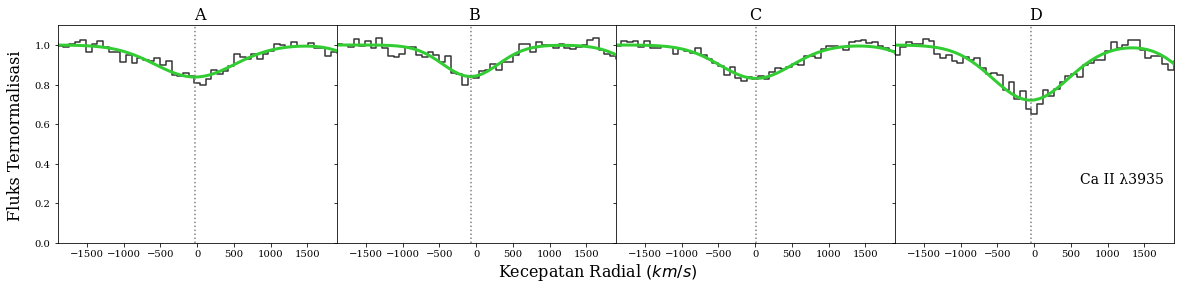

In [97]:
f, ax = plt.subplots(1, 4, figsize=(20,4), sharey='row', sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

# A
ax[0].plot(v_3935_A, fluxes_A+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].plot(v_3935_A, true_spectrum_A(wavelengths_A)+1, lw=3, color='limegreen')
ax[0].axvline(vline_3935_A, color="grey", linestyle=":")
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(-1900,1900)

# B
ax[1].plot(v_3935_B, fluxes_B+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1].plot(v_3935_B, true_spectrum_B(wavelengths_B)+1, lw=3, color='limegreen')
ax[1].axvline(vline_3935_B, color="grey", linestyle=":")
#ax[1].set_ylim(0.5, 1.1)
ax[1].set_xlim(-1900,1900)

# C
ax[2].plot(v_3935_C, fluxes_C+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[2].plot(v_3935_C, true_spectrum_C(wavelengths_C)+1, lw=3, color='limegreen')
ax[2].axvline(vline_3935_C, color="grey", linestyle=":")
#ax[2].set_ylim(0.5, 1.1)
ax[2].set_xlim(-1900,1900)

# D
ax[3].plot(v_3935_D, fluxes_D+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[3].plot(v_3935_D, true_spectrum_D(wavelengths_D)+1, lw=3, color='limegreen')
ax[3].axvline(vline_3935_D, color="grey", linestyle=":")
#ax[3].set_ylim(0.5, 1.1)
ax[3].set_xlim(-1900,1900)

f.text(0.22, 0.9, 'A', fontsize=16)
f.text(0.41, 0.9, 'B', fontsize=16)
f.text(0.605, 0.9, 'C', fontsize=16)
f.text(0.8, 0.9, 'D', fontsize=16)

f.text(0.835, 0.33, 'Ca II λ3935', fontsize=14)

f.text(0.5, 0.01, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.09, 0.5, 'Fluks Ternormalisasi', fontsize=16, va='center', rotation='vertical')

plt.show()

Text(0, 0.5, 'Fluks Ternormalisasi')

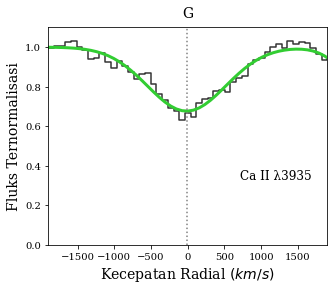

In [98]:
plt.figure(figsize=(5,4))
plt.rcParams['font.family'] = 'serif'

# G
plt.plot(v_3935_G, fluxes_G+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.plot(v_3935_G, true_spectrum_G(wavelengths_G)+1, lw=3, color='limegreen')
plt.axvline(vline_3935_G, color="grey", linestyle=":")
plt.ylim(0.0, 1.1)
plt.xlim(-1900,1900)

plt.text(0.5, 1.15, 'G', fontsize=14, ha='center')
plt.text(1200, 0.33, 'Ca II λ3935', fontsize=12, ha='center')

plt.xlabel('Kecepatan Radial $(km/s)$', fontsize=14)
plt.ylabel('Fluks Ternormalisasi', fontsize=14)

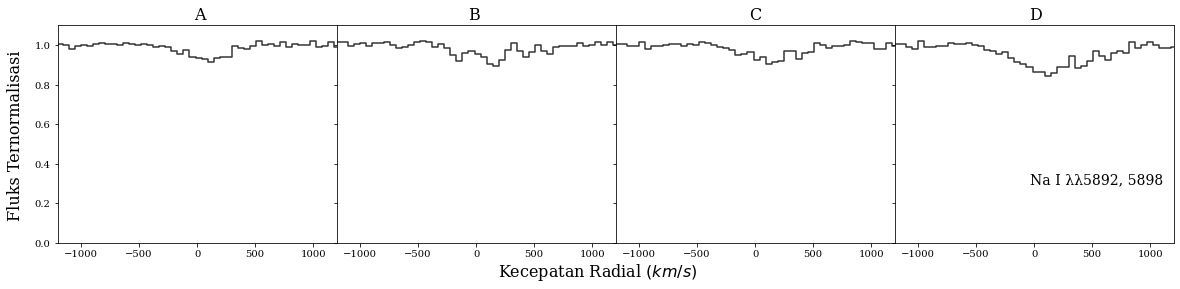

In [99]:
f, ax = plt.subplots(1, 4, figsize=(20,4), sharey='row', sharex=True, gridspec_kw={'hspace': 0, 'wspace':0})
plt.rcParams['font.family'] = 'serif'

ax[0].plot(v_5892_A, fluxes_A2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[0].set_ylim(0, 1.1)
ax[0].set_xlim(-1200,1200)

ax[1].plot(v_5892_B, fluxes_B2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[1].set_xlim(-1200,1200)

ax[2].plot(v_5892_C, fluxes_C2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[2].set_xlim(-1200,1200)

ax[3].plot(v_5892_D, fluxes_D2+1, 'k', alpha=0.8, drawstyle='steps-mid')
ax[3].set_xlim(-1200,1200)

f.text(0.22, 0.9, 'A', fontsize=16)
f.text(0.41, 0.9, 'B', fontsize=16)
f.text(0.605, 0.9, 'C', fontsize=16)
f.text(0.8, 0.9, 'D', fontsize=16)

f.text(0.8, 0.33, 'Na I λλ5892, 5898', fontsize=14)

f.text(0.5, 0.01, 'Kecepatan Radial $(km/s)$', fontsize=16, ha='center')
f.text(0.09, 0.5, 'Fluks Ternormalisasi', fontsize=16, va='center', rotation='vertical')

plt.show()

Text(0, 0.5, 'Fluks Ternormalisasi')

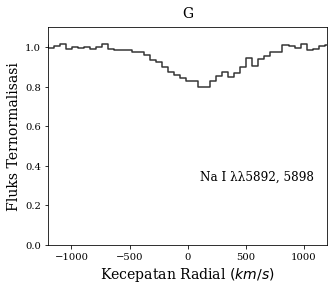

In [100]:
plt.figure(figsize=(5,4))
plt.rcParams['font.family'] = 'serif'

# G
plt.plot(v_5892_G, fluxes_G2+1, 'k', alpha=0.8, drawstyle='steps-mid')
plt.ylim(0.0, 1.1)
plt.xlim(-1200,1200)

plt.text(0, 1.15, 'G', fontsize=14, ha='center')
plt.text(600, 0.33, 'Na I λλ5892, 5898', ha='center', fontsize=12)

plt.xlabel('Kecepatan Radial $(km/s)$', fontsize=14)
plt.ylabel('Fluks Ternormalisasi', fontsize=14)